In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

archivo = pd.read_csv('Features data set.csv')


## Exploratory Analysis

In [2]:

archivo['Temperature'] = (archivo['Temperature']- 32) * (5/9)
locales = pd.read_csv('stores data-set.csv')
ventas = pd.read_csv('sales data-set.csv')

In [3]:
archivo.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [4]:
locales.head(1)

,Store,Type,Size
0,1,A,151315


In [5]:
ventas.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.5,False


In [6]:
print(archivo.shape)
print(locales.shape)
print(ventas.shape)

(8190, 12)
(45, 3)
(421570, 5)


**Table grouping by Store, Date and Holiday or not boolean.**

In [7]:
df = pd.merge(ventas, archivo, on=['Store','Date','IsHoliday'])
df = pd.merge(df, locales, on=['Store'])
df.fillna(0)

df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,15.605588,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,10.248851,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-18.922222,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,8.155556,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,16.716667,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,23.488889,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,37.855556,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [8]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,5.727778,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,14.916667,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


**Weird value right here...**

In [9]:
ventas.loc[ventas['Weekly_Sales'] == ventas['Weekly_Sales'].min()]

,Store,Dept,Date,Weekly_Sales,IsHoliday
267730,28,6,08/10/2010,-4988.94,False


**there's clearly more negative weekly sales!**

In [10]:
ventas[ventas.Weekly_Sales<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,10/08/2012,-139.65,False
2384,1,18,04/05/2012,-1.27,False
6048,1,47,19/02/2010,-863.00,False
6049,1,47,12/03/2010,-698.00,False
6051,1,47,08/10/2010,-58.00,False
...,...,...,...,...,...
419597,45,80,12/02/2010,-0.43,True
419598,45,80,19/02/2010,-0.27,False
419603,45,80,16/04/2010,-1.61,False
419614,45,80,02/07/2010,-0.27,False


## Graphical insight

In [11]:
df['Temperature'][0:1000].unique()

array([ 5.72777778,  3.61666667,  4.40555556,  8.12777778,  8.05555556,
       14.32777778, 12.54444444, 10.80555556, 16.81666667, 18.81111111,
       19.06666667, 18.24444444, 19.67222222, 22.52777778])

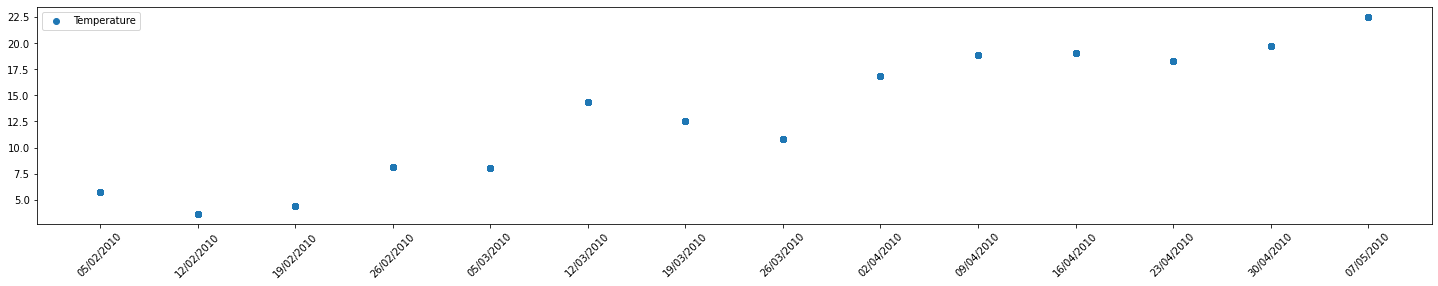

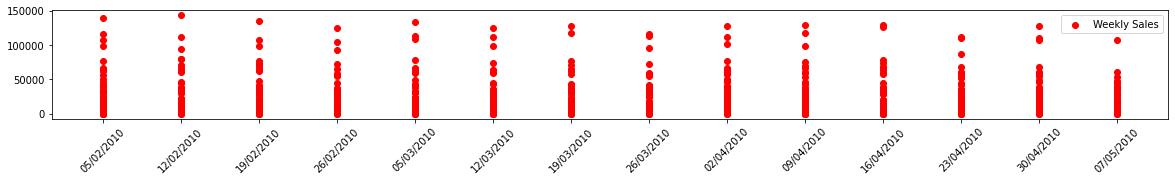

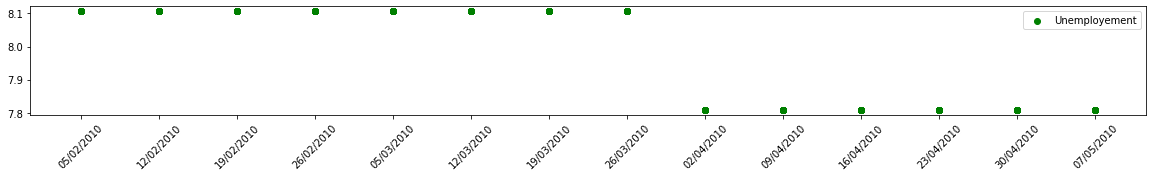

In [12]:
x = df['Date'][0:1000]

y_1 = df['Temperature'][0:1000]
y_2 = df['Weekly_Sales'][0:1000]
y_3 = df['Unemployment'][0:1000]

plt.figure(figsize=(25,4))
plt.scatter(x,y_1, label='Temperature')
plt.xticks(rotation=45)
plt.legend()

plt.figure(figsize=(20,2))
plt.scatter(x,y_2, label='Weekly Sales', color='red')
plt.xticks(rotation=45)
plt.legend()

plt.figure(figsize=(20,2))
plt.scatter(x,y_3, label='Unemployement', color='green')
plt.xticks(rotation=45)
plt.legend()


plt.show()

In [13]:
len(df['Date'])

421570

MAX VALUE:  Date            2012-12-10 00:00:00
Weekly_Sales             80931415.6
dtype: object


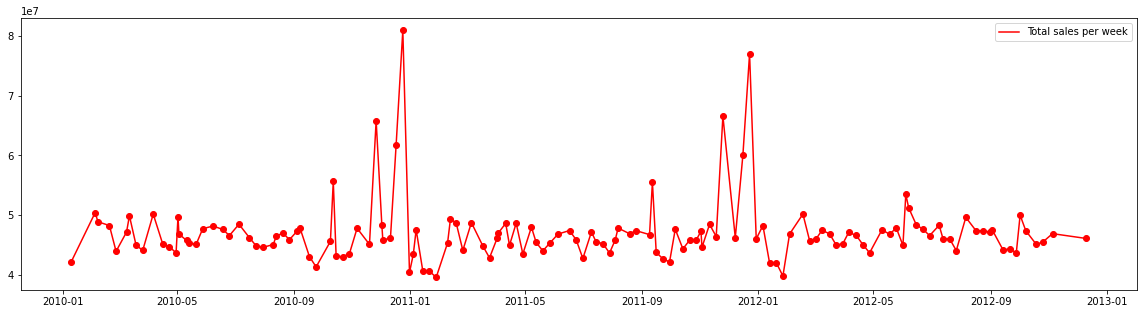

In [14]:
df.groupby(by=['Date'])

# #To analyze the Groupby object elements:
# df.groupby(by=['Date']).groups


# To order the date columns in chronological order:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by='Date')


# We sum the sales based on the week for all the shops. 
total_weekly_sales = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

# We select the day with the most sales:
weekly_sales_max = total_weekly_sales.max()

print("MAX VALUE: ",weekly_sales_max)

plt.figure(figsize=(20,5))
plt.scatter(total_weekly_sales.Date,total_weekly_sales.Weekly_Sales, color='red')
plt.plot(total_weekly_sales.Date,total_weekly_sales.Weekly_Sales, 'r', label='Total sales per week')
plt.legend()


**Based on the dates, we can deduce the highest values on the plot come from weeks previous to holidays like Halloween and Christmas, which is expected.** 

In [15]:
# Top 5 weeks with the lowest sales:

total_weekly_sales.sort_values(by='Weekly_Sales').head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


**Interestingly, the weeks after christmas tend to be the lowest ones in terms of sales!**